Prima prova dei risultati, usando dummy pre-processing

In [10]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from dtreeviz.trees import *

In [11]:
data_path= r'TrainSet/trainClinData.xls'
df= pd.read_excel(data_path)
print(df.shape)
df.head()

(1103, 40)


,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,82,P_102.png,A,72.000000,1,1.0,37.3,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SEVERE,0
1,228,P_131.png,D,35.913889,0,1.0,39.3,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,MILD,0
2,229,P_132.png,D,57.266667,0,1.0,37.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,MILD,0
3,96,P_117.png,A,39.000000,1,1.0,37.2,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
4,112,P_16.png,A,44.000000,0,1.0,38.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEVERE,0


In [ ]:
df_order= df.sort_values(by=['Row_number'])
df_order.reset_index(inplace=True, drop=True)
df_order

In [3]:
# 1° method

df.fillna(method='backfill', inplace=True)
df.dropna(inplace=True)

In [12]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(df.Prognosis)
le.classes_

array(['MILD', 'SEVERE'], dtype=object)

In [13]:
df.drop(['Row_number', 'Death', 'Prognosis', 'ImageFile', 'Hospital'], axis=1 , inplace=True)

In [14]:
# 2° method

mean_value= []
for i in range(df.shape[1]):
    mean= df.iloc[i].mean()
    mean_value.append(mean)

values= {}

for counter, value in enumerate(df.keys()):
    values[value] = mean_value[counter]
print(values)

{'Age': 16.76322580645161, 'Sex': 52.84199588477367, 'PositivityAtAdmission': 71.00022222222222, 'Temp_C': 16.002903225806453, 'DaysFever': 17.562, 'Cough': 17.924137931034487, 'DifficultyInBreathing': 68.15712962962964, 'WBC': 54.57896551724138, 'RBC': 21.442866666666667, 'CRP': 65.17515325670499, 'Fibrinogen': 9.824561403508772, 'Glucose': 128.18375, 'PCT': 47.398782051282055, 'LDH': 97.46513409961686, 'INR': 88.13425925925927, 'D_dimer': 52.581149425287364, 'Ox_percentage': 105.94619883040936, 'PaO2': 77.38116858237547, 'SaO2': 123.69457777777778, 'PaCO2': 35.45691570881226, 'pH': 52.440440613026816, 'CardiovascularDisease': 93.35366666666667, 'IschemicHeartDisease': 51.626590038314184, 'AtrialFibrillation': 45.042, 'HeartFailure': 31.75576923076923, 'Ictus': 10.705458937198069, 'HighBloodPressure': 55.724427777777784, 'Diabetes': 16.370645161290323, 'Dementia': 33.377584541062795, 'BPCO': 18.820967741935487, 'Cancer': 24.701612903225808, 'ChronicKidneyDisease': 21.68392857142857, '

In [15]:
df= df.fillna(value=values)
df.head()

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,Ictus,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position
0,72.000000,1,1.0,37.3,3.0,1.0,0.0,5.37,4.58,3.96,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0
1,35.913889,0,1.0,39.3,3.0,1.0,0.0,5.76,5.24,43.40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.241935,1.000000,0.0
2,57.266667,0,1.0,37.0,3.0,0.0,0.0,11.48,5.71,64.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.241935,30.205161,0.0
3,39.000000,1,1.0,37.2,2.0,1.0,0.0,10.17,3.45,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
4,44.000000,0,1.0,38.0,3.0,1.0,0.0,6.64,5.55,5.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [50]:
df.head()

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,Ictus,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position
0,72.000000,1,1.0,37.3,3.0,1.0,0.0,5.37,4.58,3.96,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,35.913889,0,1.0,39.3,3.0,1.0,0.0,5.76,5.24,43.40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,57.266667,0,1.0,37.0,3.0,0.0,0.0,11.48,5.71,64.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.000000,1,1.0,37.2,2.0,1.0,0.0,10.17,3.45,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,44.000000,0,1.0,38.0,3.0,1.0,0.0,6.64,5.55,5.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y.shape

(1078,)

Split part

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=2)

In [7]:
dummy= DummyClassifier()
dummy.fit(X_train, y_train)

pred_test= dummy.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.48148148148148145


In [17]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred_test= dt.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.6846846846846847


In [18]:
randomforest= RandomForestClassifier(n_estimators=1000)
randomforest.fit(X_train, y_train)

pred_test= randomforest.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.7567567567567568


In [10]:
extra= ExtraTreeClassifier()
extra.fit(X_train, y_train)

pred_test= extra.predict(X_test)
print('test: ', accuracy_score(y_test, pred_test) )

test:  0.5185185185185185


In [ ]:
print(classification_report(y_test, pred_test))

Visualization of the decision tree

[Text(0.5074621907614998, 0.96875, 'LDH <= 373.5\ngini = 0.5\nsamples = 970\nvalue = [471, 499]\nclass = SEVERE'),
 Text(0.23815592385001932, 0.90625, 'Ox_percentage <= 92.8\ngini = 0.482\nsamples = 667\nvalue = [397, 270]\nclass = MILD'),
 Text(0.05522806339389254, 0.84375, 'SaO2 <= 87.5\ngini = 0.483\nsamples = 189\nvalue = [77, 112]\nclass = SEVERE'),
 Text(0.012369540007730962, 0.78125, 'Age <= 31.0\ngini = 0.147\nsamples = 25\nvalue = [2, 23]\nclass = SEVERE'),
 Text(0.006184770003865481, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = MILD'),
 Text(0.018554310011596443, 0.71875, 'WBC <= 2.205\ngini = 0.08\nsamples = 24\nvalue = [1, 23]\nclass = SEVERE'),
 Text(0.012369540007730962, 0.65625, 'Ox_percentage <= 89.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = MILD'),
 Text(0.006184770003865481, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = MILD'),
 Text(0.018554310011596443, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = SEVERE'),
 Text(0.02

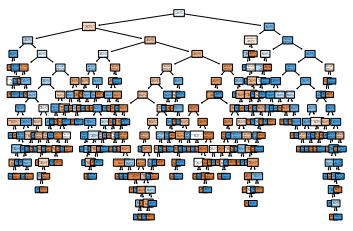

In [23]:
plot_tree(dt, 
            feature_names = df.columns[:], 
            class_names=['MILD', 'SEVERE'], 
            rounded=True, 
            filled = True)

In [ ]:
# da eseguire su Colab
viz = dtreeviz(dt, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=df.columns[:], 
               class_names=['MILD', 'SEVERE'], 
               title="Decision Tree")
viz

metrics

BA=\frac{TPR+TNR}{2}

TPR= TP / (TP + FN)
TNR= TN / (TN + FP)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
confusion_matrix(y_test, pred_test)


array([[35, 21],
       [17, 35]], dtype=int64)

In [16]:
TPR= tp/(tp+fn)
TNR= tn/(tn+fp)
print(TPR, TNR)

0.6730769230769231 0.625


In [17]:
print('final result:', (TPR+TNR)/2)

final result: 0.6490384615384616
